<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/ANN-project/blob/main/robot2bactudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

In [ ]:
z=[]
for a in range(0,180,1):
  for b in range(0,180,1):
    x=50*math.cos(math.radians(a))+40*math.cos(math.radians(a+b))
    y=50*math.sin(math.radians(a))+40*math.sin(math.radians(a+b))
    z.append(np.array((a,b,x,y)))

In [ ]:
header = ['goc1', 'goc2', 'x', 'y']

with open('data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(z)


In [ ]:
data = pd.read_csv('data.csv')
print(data.shape)
numpy_dataset = data.values
y=numpy_dataset[:,:2]/180
x=(numpy_dataset[:,2:]+90)/180
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)


(32400, 4)


In [ ]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary() 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 11,842
Trainable params: 11,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_split = 0.2)

Epoch 1/30
324/324 [==============================] - 2s 3ms/step - loss: 0.0286 - acc: 0.8451 - val_loss: 0.0019 - val_acc: 0.9524
Epoch 2/30
324/324 [==============================] - 1s 3ms/step - loss: 0.0012 - acc: 0.9539 - val_loss: 8.0624e-04 - val_acc: 0.9659
Epoch 3/30
324/324 [==============================] - 1s 3ms/step - loss: 7.9023e-04 - acc: 0.9636 - val_loss: 0.0010 - val_acc: 0.9616
Epoch 4/30
324/324 [==============================] - 1s 3ms/step - loss: 6.3917e-04 - acc: 0.9661 - val_loss: 4.6794e-04 - val_acc: 0.9734
Epoch 5/30
324/324 [==============================] - 1s 3ms/step - loss: 4.6180e-04 - acc: 0.9725 - val_loss: 3.9396e-04 - val_acc: 0.9722
Epoch 6/30
324/324 [==============================] - 1s 3ms/step - loss: 4.1888e-04 - acc: 0.9728 - val_loss: 0.0011 - val_acc: 0.9566
Epoch 7/30
324/324 [==============================] - 1s 3ms/step - loss: 3.3746e-04 - acc: 0.9768 - val_loss: 3.1583e-04 - val_acc: 0.9715
Epoch 8/30
324/324 [====================

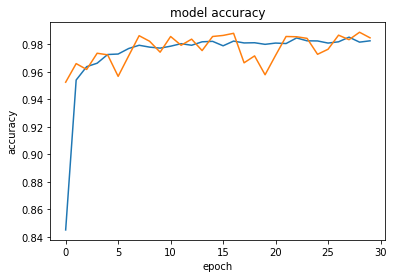

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.00014279376773629338
Do chinh xac kiem tra 0.9791666865348816


In [ ]:
Px = (40+90)/180
Py = (50+90)/180
test = model.predict([[Px,Py]])
t1 = test[0][0]*180
t2 = test[0][1]*180
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

x =  40.87254282860448 y =  50.05540889913272
12.53353089094162 88.90975713729858


In [ ]:
model.save('Robot2bac.h5')